In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [28]:
data = np.load('../data/smoke/smoke_large.npz', allow_pickle=True)

In [29]:
data_params = data['log_params'].item()
data_log_density = data['log_density']
data_log_velocity = data['log_velocity']
data_log_condition = data['log_condition']

In [30]:
data_params

{'resolution_x': 96,
 'resolution_y': 128,
 'num_frames': 400,
 'time_step': 0.125,
 'num_src_pos_x': 8,
 'num_src_pos_y': 8,
 'data_save_path': '../data/smoke/smoke_large.npz',
 'src_radius': 2,
 'src_strength': 0.25}

In [33]:
frame = 300
density = torch.from_numpy(data_log_density[frame, ...])
print(density.shape)

torch.Size([64, 128, 96])


Text(0.5, 1.0, 'Smoke density')

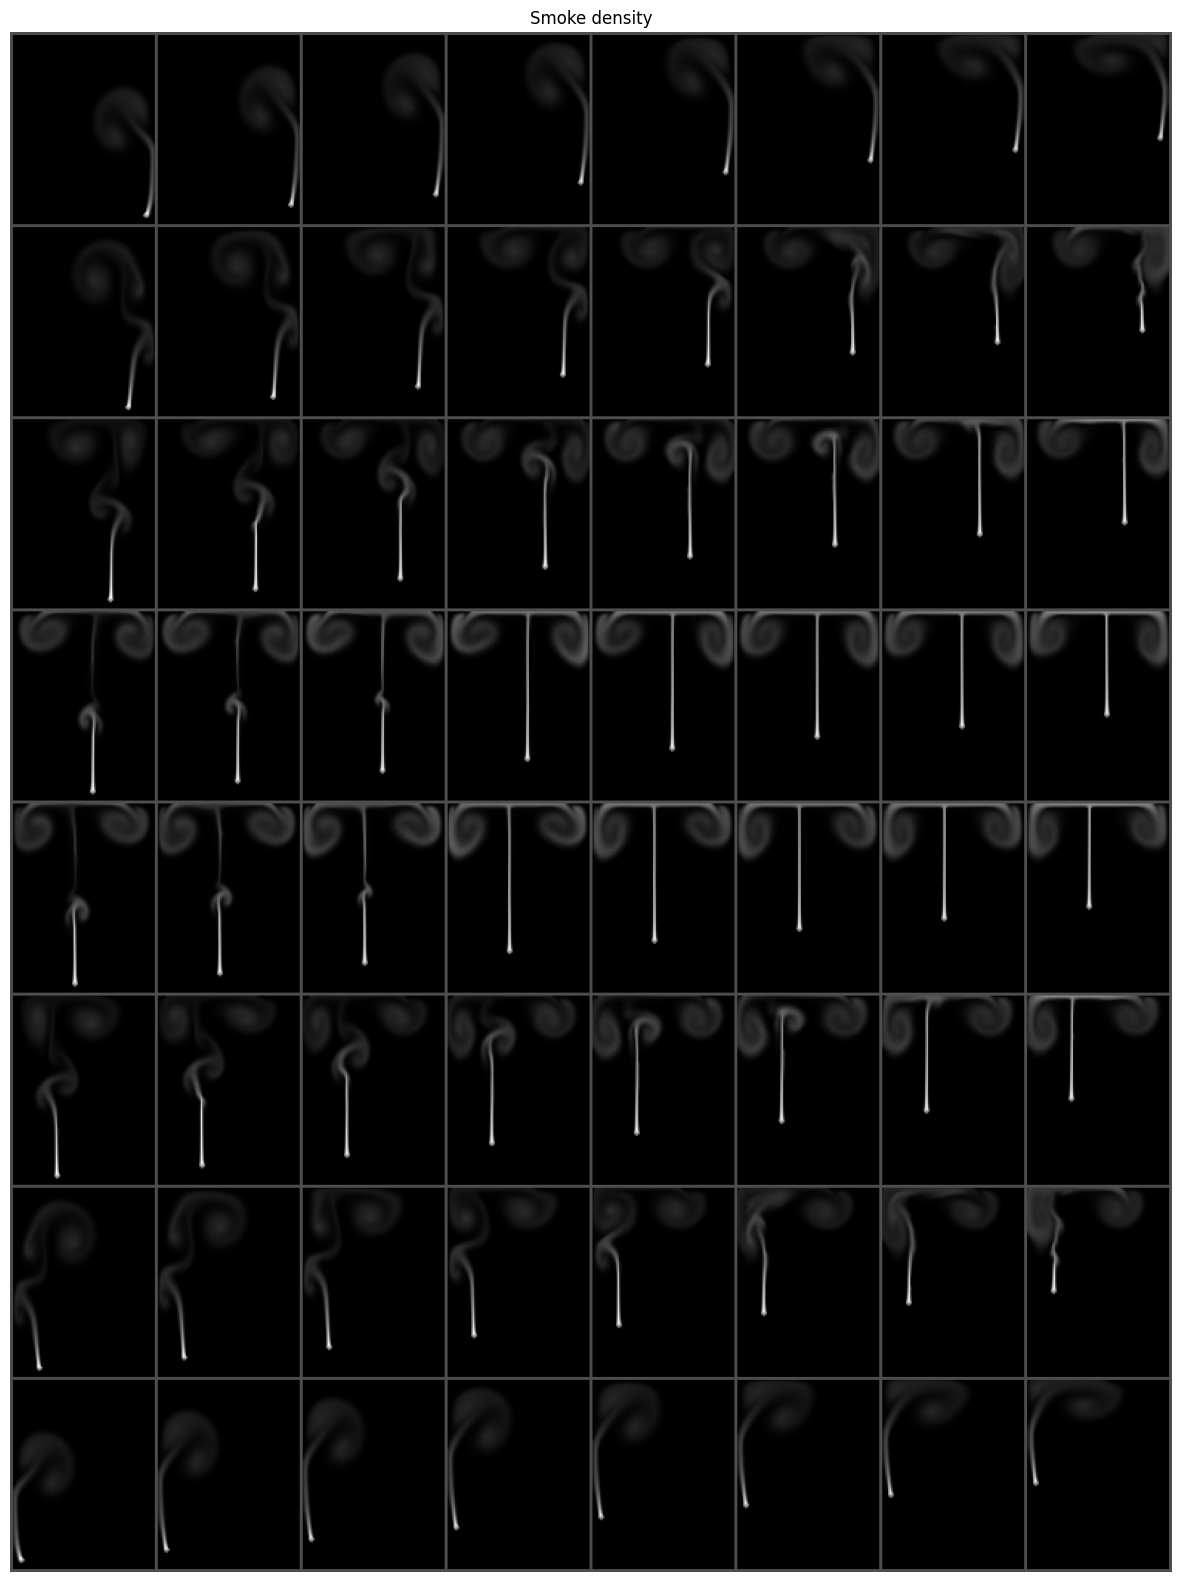

In [34]:
grid = torchvision.utils.make_grid(density.unsqueeze(1), nrow=8, padding=2, normalize=False, pad_value=1.0)
plt.figure(figsize=(20, 20))
plt.imshow(grid.detach().numpy()[0, ...], cmap='gray', origin='lower')
plt.axis('off')
plt.title('Smoke density')